In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
df = pd.read_csv('Housing.csv')
#print("Data loaded successfully!")
df.shape

(545, 13)

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols_to_encode = ['mainroad', 'guestroom', 'basement', 
                  'hotwaterheating', 'airconditioning', 'prefarea', 
                  'furnishingstatus']
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

print("Data converted using Label Encoding!")
df.head()

Data converted using Label Encoding!


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


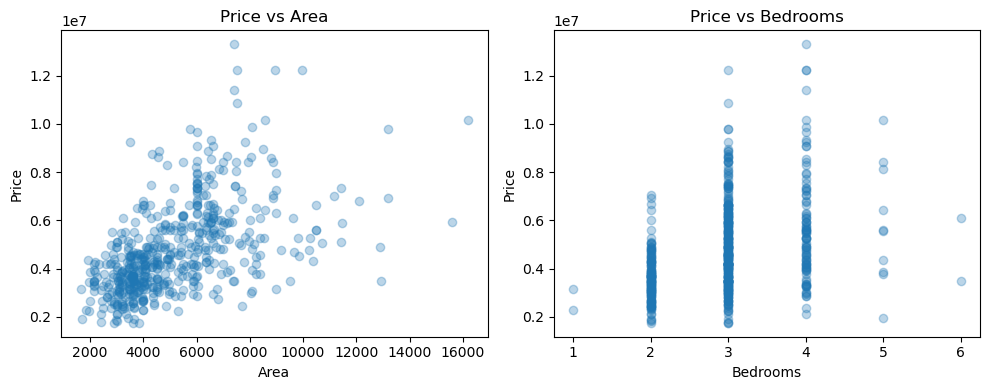

In [6]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['area'], df['price'], alpha=0.3)
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(df['bedrooms'], df['price'], alpha=0.3)
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [7]:
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train.shape[0]

381

In [9]:
X_test.shape[0]

164

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [23]:
y_pred = model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print(f"Model Accuracy: {accuracy * 100}")

Model Accuracy: 0.6435419628959109
Model Accuracy: 64.35419628959109


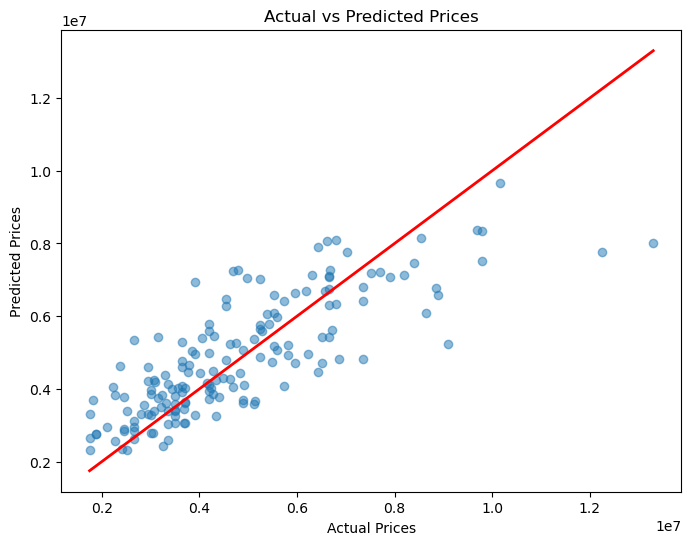

In [12]:
# visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [21]:
new_house = [[7420,	4,2,3,1,0,0,0,1,2,1,0]]

predicted_price = model.predict(new_house)
actual_price = df.iloc[0]['price']

print("Prediction Test:")
print(f"Predicted Price: {predicted_price[0]}")
print(f"Actual Price:    {actual_price}")
print(f"Difference:      {abs(predicted_price[0] - actual_price)}")

Prediction Test:
Predicted Price: 8020894.3492740365
Actual Price:    13300000
Difference:      5279105.6507259635


C:\Users\AVI.DESKTOP-APH971L\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
data =[11]
def dtype(list):
    if type(data[0])==int:
        print ("data updated")
    else:
        print("wrong")
dtype(data)

data updated


In [20]:
# Simple prediction function
def predict_house_price(area, bedrooms, bathrooms, stories, mainroad, guestroom, 
                       basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus):
    

    mainroad = 1 if mainroad == 'yes' else 0
    guestroom = 1 if guestroom == 'yes' else 0
    basement = 1 if basement == 'yes' else 0
    hotwaterheating = 1 if hotwaterheating == 'yes' else 0
    airconditioning = 1 if airconditioning == 'yes' else 0
    prefarea = 1 if prefarea == 'yes' else 0
    furnishingstatus = 0 if furnishingstatus == 'unfurnished' else 1 if furnishingstatus == 'semi-furnished' else 2
    
    features = [[area, bedrooms, bathrooms, stories, mainroad, guestroom, 
                basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]]
    
    price = model.predict(features)
    return price

# Test the function
a= int(input("enter area of house: "))
b= int(input("enter bedrooms of house: "))
bathrooms =int(input("enter bathrooms of house: "))
s = int(input("enter how meny storys of house is: "))
m = input("enter how meny bedrooms are there: ")
g = input("guestroom are there or not :")
basement = input("basement are there or not :")
hotwaterheating= input("hotwaterheating are there or not :")
airconditioning = input ("airconditioning rooms are there or not")
parking=int(input ("airconditioning rooms are there or not"))
prefarea=input("enter how meny bedrooms are there: ")
furnishingstatus=input ("airconditioning rooms are there or not : ")


test_price = predict_house_price(a, b, bathrooms,s, m, g, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus)
print(f"\n Predicted Price for test house: {test_price}")

enter area of house:  0kopj


ValueError: invalid literal for int() with base 10: '0kopj'

In [17]:
print ("hello")
print("\nngjhgj")    

hello

ngjhgj
